In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
import pickle
import joblib

1. Download data

In [28]:
# read data
data = pd.read_csv('C:/Users/sob7y adel/Downloads/student_job_fair_data.csv', na_values=['null'])


In [29]:
# Display the first 5 rows of data
print(data.head())


   student_id                       skills  experience_years  course_grades  \
0           1     Python;Data Analysis;SQL                 3          75.26   
1           2                         Java                 4          74.25   
2           3                Data Analysis                 2          74.89   
3           4                Data Analysis                 4          72.73   
4           5  Machine Learning;Python;C++                 4          84.85   

   projects_completed  extracurriculars  job_offer  
0                   9                 0          1  
1                   6                 2          1  
2                   4                 3          0  
3                   2                 3          1  
4                   1                 4          0  


In [30]:
# General information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB
None


In [31]:
# Descriptive statistics
print(data.describe())


         student_id  experience_years  course_grades  projects_completed  \
count  20000.000000      20000.000000   20000.000000        20000.000000   
mean   10000.500000          2.499100      80.092985            4.524850   
std     5773.647028          1.710861      11.519916            2.860278   
min        1.000000          0.000000      60.000000            0.000000   
25%     5000.750000          1.000000      70.127500            2.000000   
50%    10000.500000          3.000000      80.170000            5.000000   
75%    15000.250000          4.000000      90.000000            7.000000   
max    20000.000000          5.000000     100.000000            9.000000   

       extracurriculars     job_offer  
count      20000.000000  20000.000000  
mean           1.997100      0.493750  
std            1.413397      0.499973  
min            0.000000      0.000000  
25%            1.000000      0.000000  
50%            2.000000      0.000000  
75%            3.000000      1.0000

In [32]:
# Distribution of the target variable
print(data['job_offer'].value_counts())

job_offer
0    10125
1     9875
Name: count, dtype: int64


2. Data storage

In [33]:
# Convert skills to categorical variables
skills = data['skills'].str.get_dummies(';')

In [34]:
# Integrating skills with original data
data_processed = pd.concat([data.drop(['skills', 'student_id'], axis=1), skills], axis=1)


In [35]:
# Verify processed data
print(data_processed.head())

   experience_years  course_grades  projects_completed  extracurriculars  \
0                 3          75.26                   9                 0   
1                 4          74.25                   6                 2   
2                 2          74.89                   4                 3   
3                 4          72.73                   2                 3   
4                 4          84.85                   1                 4   

   job_offer  C++  Data Analysis  Java  Machine Learning  Python  SQL  
0          1    0              1     0                 0       1    1  
1          1    0              0     1                 0       0    0  
2          0    0              1     0                 0       0    0  
3          1    0              1     0                 0       0    0  
4          0    1              0     0                 1       1    0  


3. Data partitioning

In [36]:
# Determine independent and dependent variables
X = data_processed.drop('job_offer', axis=1)
y = data_processed['job_offer']


In [37]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Building the model

In [38]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Prediction on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

##5. Model evaluation

In [40]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      3053
           1       0.50      0.48      0.49      2947

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000



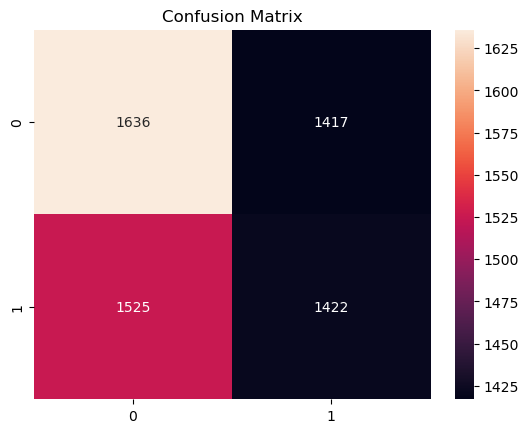

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.5090906706326452


In [43]:
# Cross-validation evaluation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {np.mean(cv_scores)}")

Cross-Validation ROC-AUC Scores: [0.50931458 0.50328439 0.51119437 0.48717925 0.49680813]
Mean CV ROC-AUC: 0.5015561431473667


6. Analyze the importance of features


In [44]:
# Feature Importance
feature_importances = pd.DataFrame({
'Feature': X.columns,
'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

In [45]:
# Show the top 10 features
print(feature_importances.head(10))

              Feature  Importance
1       course_grades    0.462420
2  projects_completed    0.170005
0    experience_years    0.109601
3    extracurriculars    0.098941
7    Machine Learning    0.028994
9                 SQL    0.028194
8              Python    0.027704
5       Data Analysis    0.026565
4                 C++    0.025502
6                Java    0.022073


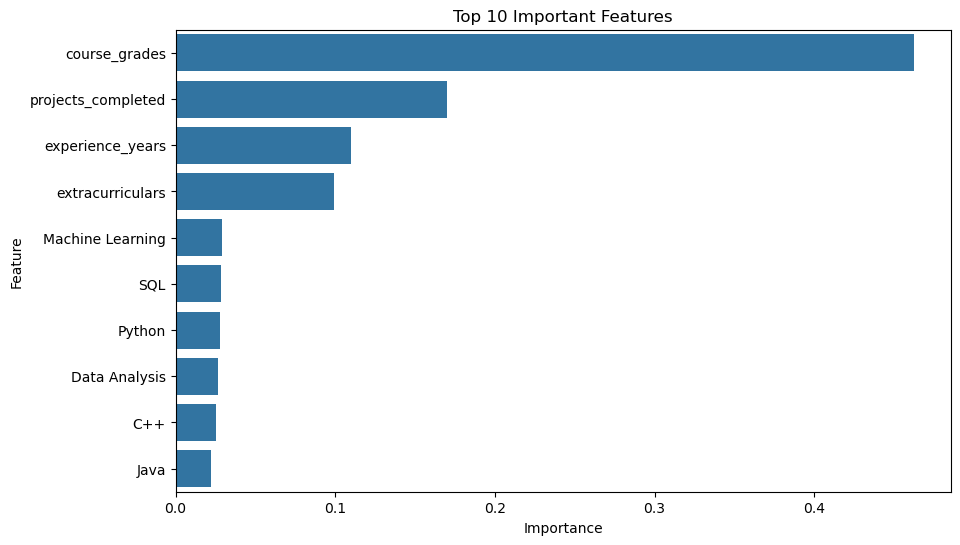

In [46]:
# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [47]:
# Save the model and features file
joblib.dump(model, 'job_offer_model.joblib')
pd.Series(X.columns).to_csv('model_features.csv', index=False)

In [48]:
# Create a ZIP file for uploading
!zip -r model_files.zip job_offer_model.joblib model_features.csv

'zip' is not recognized as an internal or external command,
operable program or batch file.
